In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import csv
import codecs
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [12]:
with codecs.open("Consumer_Reports_2018.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [13]:
df

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option)
0,Acura ILX Premium,31600.0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0
1,Acura MDX Tech,51425.0,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1
2,Acura RDX,40100.0,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0
3,Acura RLX Tech,58400.0,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1
4,Acura TLX 2.4L,39375.0,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0
5,Acura TLX SH-AWD,39375.0,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0
6,Alfa Romeo 4C,60900.0,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0
7,Alfa Romeo Giulia,55947.5,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0
8,Alfa Romeo Stelvio,42995.0,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0
9,Audi A3 Premium,37800.0,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 22 columns):
Model              270 non-null object
Price_as_tested    270 non-null float64
4spd               270 non-null int64
6over              270 non-null int64
cvt                270 non-null int64
Disp               270 non-null float64
Hp                 270 non-null int64
AWD                270 non-null int64
4WD_dummy          270 non-null int64
rear               270 non-null int64
SUV                270 non-null int64
Pickup             270 non-null int64
Minivan            270 non-null int64
Sports             270 non-null int64
Luxuary            270 non-null int64
Curb Weight(lb)    270 non-null int64
length(inch)       270 non-null int64
MPG_ovarall        270 non-null int64
Reliability        270 non-null int64
Electric           270 non-null int64
Hybrid             270 non-null int64
Hybrid(option)     270 non-null int64
dtypes: float64(2), int64(19), object(1)
memory usage:

In [15]:
print(df[["Price_as_tested", "Model"]].groupby(["Model"], as_index="False").mean())

                                               Price_as_tested
Model                                                         
Acura ILX Premium                                      31600.0
Acura MDX Tech                                         51425.0
Acura RDX                                              40100.0
Acura RLX Tech                                         58400.0
Acura TLX 2.4L                                         39375.0
Acura TLX SH-AWD                                       39375.0
Alfa Romeo 4C                                          60900.0
Alfa Romeo Giulia                                      55947.5
Alfa Romeo Stelvio                                     42995.0
Audi A3 Premium                                        37800.0
Audi A4 Premium Plus                                   40250.0
Audi A5                                                52450.0
Audi A6 3.0 Premium Plus Quattro                       60800.0
Audi Q3 Premium Plus                                   

In [6]:
df.shape

(270, 22)

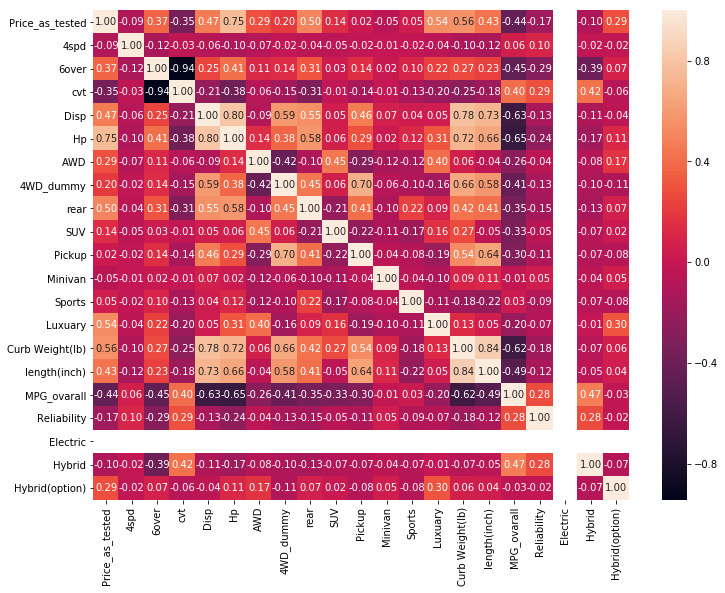

In [7]:
plt.figure(figsize=(12,9))

sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()



In [8]:
df['y'] = df['Price_as_tested']
df2 = df.drop('Price_as_tested', axis=1)

In [9]:
df2.describe()

,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),y
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.000000,270.000000,270.000000
mean,0.003704,0.792593,0.188889,2.783333,247.929630,0.555556,0.125926,0.288889,0.366667,0.074074,0.022222,0.066667,0.307407,3931.570370,188.103704,24.855556,2.948148,0.0,0.062963,0.074074,39339.225926
std,0.060858,0.406203,0.392147,1.217889,82.597012,0.497827,0.332382,0.454088,0.482789,0.262378,0.147679,0.249907,0.462277,968.377596,17.207794,7.233073,1.202961,0.0,0.243347,0.262378,14796.163343
min,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2090.000000,143.000000,14.000000,1.000000,0.0,0.000000,0.000000,13975.000000
25%,0.000000,1.000000,0.000000,2.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3320.000000,179.000000,20.000000,2.000000,0.0,0.000000,0.000000,28445.000000
50%,0.000000,1.000000,0.000000,2.400000,249.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3755.000000,188.000000,24.000000,3.000000,0.0,0.000000,0.000000,37880.000000
75%,0.000000,1.000000,0.000000,3.500000,305.750000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4420.000000,196.000000,28.000000,4.000000,0.0,0.000000,0.000000,47870.625000
max,1.000000,1.000000,1.000000,6.700000,460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7970.000000,250.000000,69.000000,5.000000,0.0,1.000000,1.000000,84315.000000


MPG　燃費
curbweight 重さ


In [24]:
df2[df2.columns[df2.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

In [26]:
train = df2.dropna(subset=["y"])
train["MPG_ovarall"].describe()

count    270.000000
mean      24.855556
std        7.233073
min       14.000000
25%       20.000000
50%       24.000000
75%       28.000000
max       69.000000
Name: MPG_ovarall, dtype: float64

In [27]:
train = train.fillna(df2.median())
train.isnull().sum()

Model              0
4spd               0
6over              0
cvt                0
Disp               0
Hp                 0
AWD                0
4WD_dummy          0
rear               0
SUV                0
Pickup             0
Minivan            0
Sports             0
Luxuary            0
Curb Weight(lb)    0
length(inch)       0
MPG_ovarall        0
Reliability        0
Electric           0
Hybrid             0
Hybrid(option)     0
y                  0
dtype: int64

In [28]:
train.shape

(270, 22)

In [61]:
max(df2["price"])

456287.5

In [69]:
df2["price"].max()

456287.5

In [72]:
mask = df2["price"] == 456287.5

In [75]:
df2[mask]

,Model,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,...,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),price
188,"Lincoln Continental Select (2.7T, AWD)",0,1,0,2.7,335,1,0,0,0,...,0,1,4540.0,201.0,20.0,2,0,0,0,456287.5


In [89]:
df_exp = df2.drop("Model", axis=1)

In [31]:
y = train["y"]

In [32]:
x = train.drop("price", axis=1)

KeyError: "['price'] not found in axis"

In [33]:
train

,Model,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),y
0,Acura ILX Premium,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0,31600.0
1,Acura MDX Tech,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1,51425.0
2,Acura RDX,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0,40100.0
3,Acura RLX Tech,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1,58400.0
4,Acura TLX 2.4L,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0,39375.0
5,Acura TLX SH-AWD,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0,39375.0
6,Alfa Romeo 4C,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0,60900.0
7,Alfa Romeo Giulia,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0,55947.5
8,Alfa Romeo Stelvio,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0,42995.0
9,Audi A3 Premium,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0,37800.0


hpとweightは相関が強過ぎる

In [67]:
hp = train.loc[:, ["Hp"]].values
length = train.loc[:, ["length(inch)"]].values
mpg = train.loc[:, ["Curb Weight(lb)"]].values

In [68]:
hp.shape

(270, 1)

In [69]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr = LinearRegression()

In [70]:
lr.fit(hp,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_pred = lr.predict(hp)

In [76]:
price_adj = y_pred - y

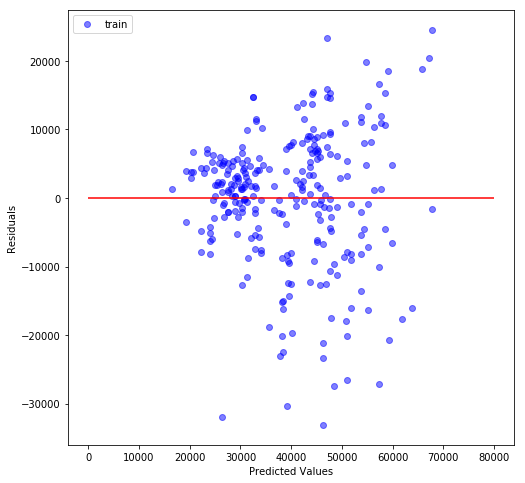

In [86]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, price_adj, color='blue', marker='o', label='train', alpha=0.5)

plt.xlabel('Predicted Values')                  # x軸のラベルを表示
plt.ylabel('Residuals')                         # y軸のラベルを表示
plt.legend(loc='upper left')                    # 凡例を左上に表示
plt.hlines(y=0, xmin=-10, xmax=80000, color='red') # 残差0の線を表示
# plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定



In [87]:
lr.fit(hp,length)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
len_pred = lr.predict(hp)
len_adj = len_pred - length

In [94]:
lr.fit(len_adj,price_adj)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

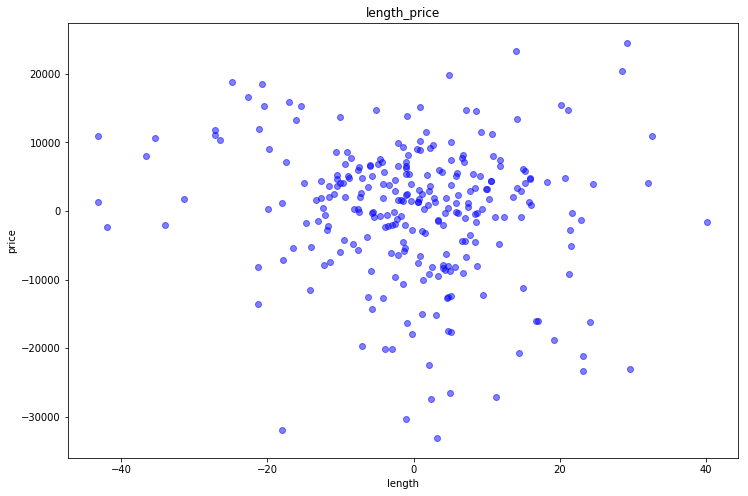

In [101]:
plt.figure(figsize=(12, 8))
plt.scatter(len_adj, price_adj, color='blue', marker='o', label='train', alpha=0.5)
plt.title('length_price')     # グラフのタイトルを表示
plt.xlabel('length')               # x軸のラベルを表示
plt.ylabel('price')                  # y軸のラベルを表示
plt.show() 

,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option)
0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100.0,182.0,28.0,1,0,0,0
1,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200.0,196.0,21.0,2,0,0,1
2,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850.0,184.0,22.0,4,0,0,0
3,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930.0,198.0,23.0,2,0,0,1
4,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480.0,190.0,27.0,2,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [176]:

print('train: %.3f' % rf.score(X_train, y_train))
print('test : %.3f' % rf.score(X_test, y_test))

train: 0.965
test : 0.271


In [178]:
feature_names = x.columns

In [180]:
feature_names

Index(['4spd', '6over', 'cvt', 'Disp', 'Hp', 'AWD', '4WD_dummy', 'rear', 'SUV',
       'Pickup', 'Minivan', 'Sports', 'Luxuary', 'Curb Weight(lb)',
       'length(inch)', 'MPG_ovarall', 'Reliability', 'Electric', 'Hybrid',
       'Hybrid(option)'],
      dtype='object')

In [181]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
X_std = scaler.fit_transform(x) # Xを標準化した行列を生成

In [213]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 主成分を2つまで取得
X_pca = pca.fit_transform(X_std)

In [214]:
X_pca[:10]

array([[ -2.49688674,  -1.16414293, -11.53990349,   3.54556129],
       [  1.89271825,   5.43505789,   2.75979091,   2.22515112],
       [  0.52459227,   3.26199108,  -0.90388261,   4.48040642],
       [  1.74073575,   5.62767678,  -1.89895649,   4.25985272],
       [ -2.35199666,  -1.53109118, -10.31054495,   2.93380648],
       [  0.80395792,   3.93556417,  -7.60657269,   7.75796047],
       [ -0.86790037,  -1.31913943,  -0.28530506, -10.14156724],
       [  1.04119734,   4.21436685,  -7.20271125,   5.03253865],
       [ -1.67456355,   6.47517426,  -3.03745208,   7.02514626],
       [ -5.41377569,   5.36606394,  -9.21484468,  12.0052949 ]])

In [215]:
print(pca.explained_variance_ratio_)

[0.23766722 0.12466433 0.09398042 0.08349909]


In [216]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.23766722 0.36233155 0.45631197 0.53981106]


Text(0,0.5,'pc2')

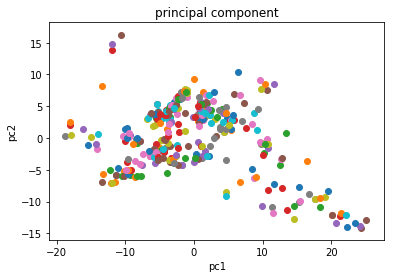

In [217]:
for label in np.unique(y):
        plt.scatter(X_pca[y == label, 0],
                    X_pca[y == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [219]:
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率: [0.23766722 0.12466433 0.09398042 0.08349909]
累積寄与率: 0.5398110619232992


### HP,laxury, curbweight, Disp
### おそらくメーカーも寄与率がたかそうなので、モデルのメーカー部分だけ取り出しエンコードして説明変数に加える